# Rozkłady prawdopodobieństwa a testowanie hipotez

Aby zilustrować związek pomiędzy **rozkładami prawdopodobieństwa** a **testowaniem hipotez**, rozważmy następujący problem:

  * Średnia masa noworodków w USA wynosi $3.5$ kg, przy odchyleniu standardowym $0.76$ kg. 
  * Załóżmy, że chcemy **znaleźć** wszystkie dzieci znacznie różniące się od normy (aby móc monitorować ich rozwój). 
  * Co zrobić z dzieckiem, które urodziło się z wagą $2.6$ kg?
  * Możemy wypowiedzieć ten problem w formie testu hipotez:  
    * nasza hipoteza mówi, że dziecko pochodzi z populacji ``zdrowych'' niemowląt. 
    * czy możemy odrzucić hipotezę, czy też ciężar dziecka sugeruje, że nie ma podstaw do odrzucenia takiej hipotezy?


Aby odpowiedzieć na to pytanie, możemy postępować w następujący sposób:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy import integrate

Zdefiniujmy zmienną losową o rozkładzie Normalnym z parametrami $\mu=3.5$, $\sigma=0.76$

In [2]:
md, sd = 3.5, 0.76
nd = stats.norm(md, sd)

Znajdź dystrybuantę (CDF) tej zmiennej losowej  oraz wyznacz $CDF(2.6)$.

Innymi słowy, prawdopodobieństwo, że zdrowe dziecko jest co najmniej o $0.9$ kg lżejsze od przeciętnego dziecka:
$$
P(X<2.6)=CDF(2,6)=0.118.
$$

In [3]:
# Shade the regions beyond a certain "checkVal"
checkVal = 2.6
print('p = {0:5.3f}'.format(nd.cdf(checkVal)))

p = 0.118


# Zadanie 1
Zilustruj taką sytuację na rysunku przedstawiającym gęstość i dystrybuantę rozkładu normalnego o parametrach $\mu=3.5$, $\sigma=0.76$.

0.1182


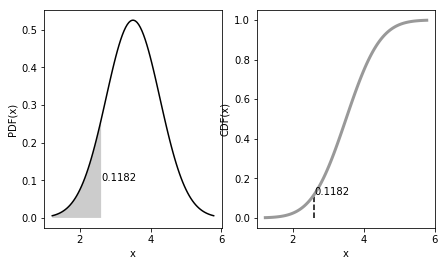

In [4]:
x0=nd.cdf(checkVal)

(inte,err)=integrate.quad(lambda x: nd.pdf(x), -np.inf, checkVal)
print(np.round(inte,4))

x = np.linspace(md-3*sd,md+3*sd,100)
yp = nd.pdf(x)
y = nd.cdf(x)
#x1 = np.linspace(-3, x0)
x1 = np.linspace(md-3*sd, checkVal)
y1 = nd.pdf(x1)

figs, axs = plt.subplots(1,2, figsize=(7, 4))

axs[0].plot(x,yp, 'k')
axs[0].fill_between(x1, y1, facecolor='#CCCCCC')
axs[0].text(checkVal, 0.1, np.round(inte,4))
axs[0].set_xlabel('x')
axs[0].set_ylabel('PDF(x)')

axs[1].plot(x, y, '#999999', lw=3)
axs[1].set_xlabel('x')
axs[1].set_ylabel('CDF(x)')
axs[1].text(checkVal, nd.cdf(checkVal), np.round(nd.cdf(checkVal),4))
plt.vlines(checkVal, 0, nd.cdf(checkVal), linestyles='--')
plt.show()


# Zadanie 2
My zakładamy że zjawisko to jest modelowane rozkładem normalny więc prawdopodobieństwo, że zdrowe dziecko jest co najmniej o $0.9$ kg cięższe od przeciętnego dziecka, wynosi również $11.8\%$.

Jeśli dziecko jest zdrowe, prawdopodobieństwo, że jego masa odbiega o co najmniej $0.9$ kg od średniej wynosi $2 \cdot 11,8\% = 23,6\%=0.236$. 

To nie jest znaczące, więc nie mamy wystarczających dowodów na odrzucenie naszej hipotezy, a nasze dziecko uważa się za zdrowe.

Zilustruj taką sytuację na rysunku przedstawiającym gęstość i dystrybuantę rozkładu normalnego o parametrach $\mu=3.5$, $\sigma=0.76$.

0.1182


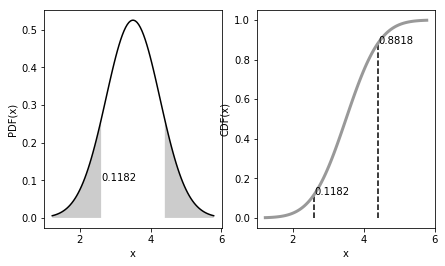

0.236329736314


In [37]:
x0=nd.cdf(checkVal)

(inte,err)=integrate.quad(lambda x: nd.pdf(x), -np.inf, checkVal)
print(np.round(inte,4))

x = np.linspace(md-3*sd,md+3*sd,100)
yp = nd.pdf(x)
y = nd.cdf(x)
#x1 = np.linspace(-3, x0)
x1 = np.linspace(md-3*sd, checkVal)
y1 = nd.pdf(x1)
x2 = np.linspace(md+ (md-checkVal), md+3*sd)
y2 = nd.pdf(x2)

figs, axs = plt.subplots(1,2, figsize=(7, 4))

axs[0].plot(x,yp, 'k')
axs[0].fill_between(x1, y1, facecolor='#CCCCCC')
axs[0].fill_between(x2, y2, facecolor='#CCCCCC')
axs[0].text(checkVal, 0.1, np.round(inte,4))
axs[0].set_xlabel('x')
axs[0].set_ylabel('PDF(x)')

axs[1].plot(x, y, '#999999', lw=3)
axs[1].set_xlabel('x')
axs[1].set_ylabel('CDF(x)')
axs[1].text(checkVal, nd.cdf(checkVal), np.round(nd.cdf(checkVal),4))
axs[1].vlines(checkVal, 0, nd.cdf(checkVal), linestyles='--')
axs[1].vlines(md+ (md-checkVal), 0, nd.cdf(md+ (md-checkVal)), linestyles='--')
axs[1].text(md+ (md-checkVal), nd.cdf(md+ (md-checkVal)), np.round(nd.cdf(md+ (md-checkVal)),4))
plt.show()
print(2*x0)

# Zadanie 3
Czy w powyzszych rozwiązaniach można użyć funkcji <tt>nd.sf</tt>?

Jeżeli tak to zrób to.

In [40]:
nd.sf(checkVal)

0.88183513184280082

In [41]:
nd.cdf(md+ (md-checkVal))

0.88183513184280082